In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

## 1.Load the Datasets

In [4]:
heart= pd.read_csv("heart.csv")

In [5]:
air_quality = pd.read_csv("airquality.csv")

In [6]:
print("Air Quality Dataset")
print(air_quality.head())

Air Quality Dataset
         Date   Time   region    CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  2021-09-01  05:00     West  0.403029   317.973275  0.253801  0.388162   
1  2021-06-21  04:00  Central  2.130334   309.501825  0.159949  0.649852   
2  2021-10-08  01:00    North  0.274461   372.354422  0.762503  0.091136   
3  2021-06-07  00:00    South  2.756261   229.372972  0.280890  0.062994   
4  2021-04-20  07:00     West  1.389909   456.091013  0.692125  0.805871   

   PT08.S2(NMHC)   NOx(GT)  PT08.S3(NOx)   NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0     243.507973  0.218607    210.497147  0.591986    478.327898   121.660635   
1     489.866154  0.005281    293.251185  0.748792    463.923388   361.749739   
2     229.223324  0.268103    229.519773  0.933261    434.822043   243.313320   
3     230.965862  0.784235    411.595170  0.924861    133.247671   486.506576   
4     214.651751  0.446636    178.042814  0.734297    221.107658   214.072488   

           T         RH        AH  


In [7]:
print("Heart Disease Dataset")
print(heart.head())

Heart Disease Dataset
   age  sex region  cp  trestbps  chol  fbs  restecg  thalach  exang  \
0   73    0  South   3       134   207    0        1      100      1   
1   76    0  South   3       176   298    1        0       94      1   
2   29    1   West   1        95   262    0        2      151      1   
3   32    1  South   1       176   366    0        1      175      0   
4   32    1   West   0        99   216    1        1       92      0   

    oldpeak  slope  ca  thal  target  
0  2.989100      1   2     6       1  
1  3.200625      1   3     7       0  
2  4.548789      2   3     6       1  
3  5.906167      2   0     3       1  
4  4.954223      2   0     3       0  


In [34]:
air_quality.head()

,Date,Time,region,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2021-09-01,05:00,West,0.403029,317.973275,0.253801,0.388162,243.507973,0.218607,210.497147,0.591986,478.327898,121.660635,28.280242,38.427598,0.261101
1,2021-06-21,04:00,Central,2.130334,309.501825,0.159949,0.649852,489.866154,0.005281,293.251185,0.748792,463.923388,361.749739,0.621563,64.485321,0.360803
2,2021-10-08,01:00,North,0.274461,372.354422,0.762503,0.091136,229.223324,0.268103,229.519773,0.933261,434.822043,243.313320,16.624250,80.102733,0.220722
3,2021-06-07,00:00,South,2.756261,229.372972,0.280890,0.062994,230.965862,0.784235,411.595170,0.924861,133.247671,486.506576,6.885601,47.520008,0.471267
4,2021-04-20,07:00,West,1.389909,456.091013,0.692125,0.805871,214.651751,0.446636,178.042814,0.734297,221.107658,214.072488,26.904520,68.772361,0.347328


## 2.Data Cleaning

### Handle Missing Data

In [10]:
heart.fillna(heart.mode().iloc[0],inplace=True)

In [11]:
air_quality.fillna(air_quality.mode().iloc[0],inplace=True)

### remove duplicate rows

In [12]:
air_quality.drop_duplicates(inplace=True)
heart.drop_duplicates(inplace=True)

In [13]:
print("Data Cleaning Done")

Data Cleaning Done


## 3.Data Integration

In [14]:
air_quality.columns

Index(['Date', 'Time', 'region', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)',
       'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)',
       'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

In [15]:
heart.columns

Index(['age', 'sex', 'region', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [16]:
data = pd.merge(air_quality, heart,on="region" , how="inner")

In [17]:
data.columns

Index(['Date', 'Time', 'region', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)',
       'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)',
       'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'age', 'sex', 'cp',
       'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak',
       'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [18]:
print("Merged Data")
print(data.head())

Merged Data
         Date   Time region    CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  2021-09-01  05:00   West  0.403029   317.973275  0.253801  0.388162   
1  2021-09-01  05:00   West  0.403029   317.973275  0.253801  0.388162   
2  2021-09-01  05:00   West  0.403029   317.973275  0.253801  0.388162   
3  2021-09-01  05:00   West  0.403029   317.973275  0.253801  0.388162   
4  2021-09-01  05:00   West  0.403029   317.973275  0.253801  0.388162   

   PT08.S2(NMHC)   NOx(GT)  PT08.S3(NOx)  ...  chol  fbs  restecg  thalach  \
0     243.507973  0.218607    210.497147  ...   262    0        2      151   
1     243.507973  0.218607    210.497147  ...   216    1        1       92   
2     243.507973  0.218607    210.497147  ...   210    1        0      183   
3     243.507973  0.218607    210.497147  ...   150    0        2       84   
4     243.507973  0.218607    210.497147  ...   197    0        2      171   

   exang   oldpeak  slope  ca  thal  target  
0      1  4.548789      2   

## 4.Data Transformation

### Convert Categorical columns to numeric using Label Encoding

In [19]:
# Convert the column to strings
data = data.astype(str)

In [21]:
encoder = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = encoder.fit_transform(data[col])

In [22]:
data.head()

,Date,Time,region,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),...,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,226,5,4,103,546,244,408,379,226,274,...,109,0,2,51,1,791,2,3,1,1
1,226,5,4,103,546,244,408,379,226,274,...,65,1,1,131,0,848,2,0,0,0
2,226,5,4,103,546,244,408,379,226,274,...,59,1,0,82,1,960,0,2,0,1
3,226,5,4,103,546,244,408,379,226,274,...,0,0,2,123,0,968,0,1,2,1
4,226,5,4,103,546,244,408,379,226,274,...,46,0,2,71,0,343,0,2,0,0


### Normalize numerical Values

In [23]:
scaler = StandardScaler()
data[data.columns] = scaler.fit_transform(data)
print("Data Transformation Done")

Data Transformation Done


## 5.Data Error Correction(Remove Outlier using Z-score)

In [24]:
from scipy.stats import zscore

In [25]:
data = data[(np.abs(zscore(data))<3).all(axis=1)]
print("Data Error Correction Done")

Data Error Correction Done


## 6.Data Model Buliding and Prediction

In [26]:
data

,Date,Time,region,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),...,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.603269,0.688110,1.322023,-1.377201,0.160141,-0.884183,-0.318895,-0.411628,-0.947546,-0.783414,...,-0.151431,-1.055214,1.282486,-0.406446,0.982087,1.009030,1.192128,1.314018,0.018106,1.070074
1,0.603269,0.688110,1.322023,-1.377201,0.160141,-0.884183,-0.318895,-0.411628,-0.947546,-0.783414,...,-0.772021,0.947675,0.041801,1.547052,-1.018240,1.206453,1.192128,-1.397473,-1.218173,-0.934515
2,0.603269,0.688110,1.322023,-1.377201,0.160141,-0.884183,-0.318895,-0.411628,-0.947546,-0.783414,...,-0.856647,0.947675,-1.198883,0.350534,0.982087,1.594371,-1.287206,0.410188,-1.218173,1.070074
3,0.603269,0.688110,1.322023,-1.377201,0.160141,-0.884183,-0.318895,-0.411628,-0.947546,-0.783414,...,-1.688801,-1.055214,1.282486,1.351702,-1.018240,1.622079,-1.287206,-0.493642,1.254385,1.070074
4,0.603269,0.688110,1.322023,-1.377201,0.160141,-0.884183,-0.318895,-0.411628,-0.947546,-0.783414,...,-1.040003,-1.055214,1.282486,0.081928,-1.018240,-0.542642,-1.287206,0.410188,-1.218173,-0.934515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200397,0.196421,-0.629846,1.322023,0.862277,1.036761,-0.371907,-1.137336,1.515781,-1.505019,-1.692699,...,1.301312,0.947675,1.282486,-1.383195,-1.018240,1.400412,-0.047539,-0.493642,0.018106,-0.934515
200398,0.196421,-0.629846,1.322023,0.862277,1.036761,-0.371907,-1.137336,1.515781,-1.505019,-1.692699,...,1.611607,0.947675,-1.198883,-1.456451,-1.018240,0.035771,1.192128,-0.493642,1.254385,-0.934515
200399,0.196421,-0.629846,1.322023,0.862277,1.036761,-0.371907,-1.137336,1.515781,-1.505019,-1.692699,...,-1.434923,-1.055214,1.282486,0.228441,-1.018240,1.639397,1.192128,1.314018,-1.218173,1.070074
200400,0.196421,-0.629846,1.322023,0.862277,1.036761,-0.371907,-1.137336,1.515781,-1.505019,-1.692699,...,-1.011794,-1.055214,1.282486,-0.699471,0.982087,-0.774700,1.192128,1.314018,-1.218173,1.070074


In [27]:
x= data.drop(columns=['target'])
y= data['target']

In [28]:
y = y.round().astype(int)  # Convert to nearest integer if it's continuous


### Split dataset into training and test set

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

### Train simple ml model

In [30]:
model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

### Make Predictions

In [31]:
y_pred = model.predict(x_test)

### Evaluate Model

In [32]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy:{accuracy:.2f}")

Model Accuracy:1.00


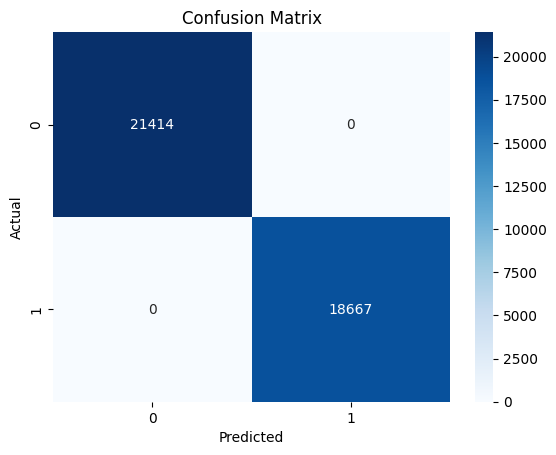

In [33]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues')
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")

plt.show()